In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
import matplotlib.pyplot as plt
import base64

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      // await new Promise((resolve) => capture.onclick = resolve);
    setInterval(function() {
        context.drawImage(video, 0, 0, canvas.width, canvas.height);  // Draw video frame on canvas
        imageData = canvas.toDataURL('image/jpeg');  // Convert canvas to JPEG image data
        google.colab.kernel.invokeFunction('update_variable', [imageData], {});
    }, 100);
      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);

    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  # Show the image which was just taken.
  # for i in range(1):
    filename = take_photo()
    print('Saved to {}'.format(filename))
    # img = np.asarray(cv2.imread('/content/photo.jpg'))
    # detect_obj(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.imshow('')
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>

Saved to photo.jpg
name 'plt' is not defined


In [ ]:
def update_variable(image):
  print(image)

#How to use YOLO

## first import required libs

In [ ]:
import cv2

(only for colab) downlad the weights and config

In [ ]:
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg -O yolov3.cfg
!wget https://pjreddie.com/media/files/yolov3.weights -O yolov3.weights

--2024-12-24 09:18:41--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg’

yolov3.cfg          100%[===================>]   8.15K  --.-KB/s    in 0s      

2024-12-24 09:18:41 (89.8 MB/s) - ‘yolov3.cfg’ saved [8342/8342]

--2024-12-24 09:18:41--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  12.7MB/s    in 20s     

2024-12-24 09:1

get the weights and config using cv2.dnn.readNetFromDarknet

In [ ]:
net = cv2.dnn.readNet('/content/yolov3.weights', '/content/yolov3.cfg')

In [ ]:
layer_names = net.getLayerNames()

##output layer will be the last layer of YOLO model

In [ ]:
output_layer = [layer_names[i-1] for i in net.getUnconnectedOutLayers()]

In [ ]:
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names


--2024-12-24 09:19:02--  https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 625 [text/plain]
Saving to: ‘coco.names’

coco.names          100%[===================>]     625  --.-KB/s    in 0s      

2024-12-24 09:19:03 (35.1 MB/s) - ‘coco.names’ saved [625/625]



In [ ]:
classes = []
with open('coco.names', 'r') as f:
    classes = [line.strip() for line in f.readlines()]

## Object detection using YOLO

In [ ]:

def detect_obj(image):

  try:
  # Show the image which was just taken.
  # for i in range(1):
    filename = take_photo()
    print('Saved to {}'.format(filename))
    # img = np.asarray(cv2.imread('/content/photo.jpg'))
    # detect_obj(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.imshow('')
  except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
    print(str(err))

  boxes = []
  confidences = []
  class_ids = []

  height, width , _ = image.shape
  blob = cv2.dnn.blobFromImage(image, scalefactor = 0.0039, size = (416,416), mean = (0,0,0) ,swapRB = True,crop =False )
  net.setInput(blob)
  outputs = net.forward(output_layer)
  for output in outputs:
    for detections in output:
      score = detections[5:]
      class_id = np.argmax(score)
      confidence = score[class_id]
      if confidence > 0.5:
        center_x = int(detections[0]*width)
        center_y = int(detections[1]*height)
        w = int(detections[2]*width)
        h = int(detections[3]*height)
        x = int(center_x - w/2)
        y = int(center_y - h/2)
        boxes.append([x,y,w,h])
        confidences.append(float(confidence))
        class_ids.append(class_ids)
  indexes = cv2.dnn.NMSBoxes(boxes,confidences,0.5,0.4)
  for i in range(len(boxes)):
   if i in indexes:
      x,y,w,h = boxes[i]
      # label   = str(classes[int(class_ids[i])])
      confidence = confidences[i]
      cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),3)
      cv2.putText(image,f"{classes}{confidence:.2f}",(x,y+30),cv2.FONT_HERSHEY_PLAIN,3,(0,255,0),3)
      plt.imshow(image)
  return image


<IPython.core.display.Javascript object>

Saved to photo.jpg
Image data of dtype <U1 cannot be converted to float


array([[[185, 187, 186],
        [183, 185, 184],
        [182, 184, 183],
        ...,
        [188, 207, 203],
        [188, 207, 201],
        [192, 211, 205]],

       [[190, 192, 191],
        [190, 192, 191],
        [189, 191, 190],
        ...,
        [191, 210, 206],
        [190, 209, 203],
        [192, 211, 205]],

       [[181, 185, 184],
        [183, 187, 186],
        [184, 188, 187],
        ...,
        [195, 214, 210],
        [191, 210, 204],
        [191, 210, 204]],

       ...,

       [[ 51,  39,  49],
        [ 50,  38,  48],
        [ 55,  43,  53],
        ...,
        [142, 135, 125],
        [142, 135, 125],
        [143, 136, 126]],

       [[ 44,  31,  40],
        [ 46,  33,  42],
        [ 56,  44,  54],
        ...,
        [141, 134, 124],
        [141, 134, 126],
        [141, 134, 126]],

       [[ 45,  32,  41],
        [ 44,  31,  40],
        [ 49,  37,  47],
        ...,
        [141, 134, 124],
        [140, 133, 125],
        [139, 132, 124]]], dtype=uint8)
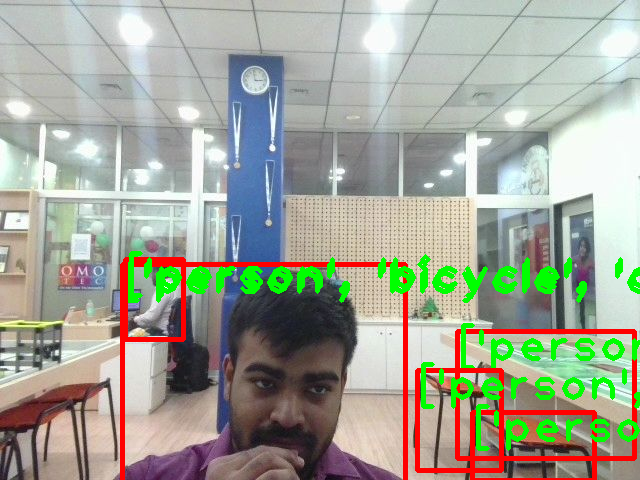

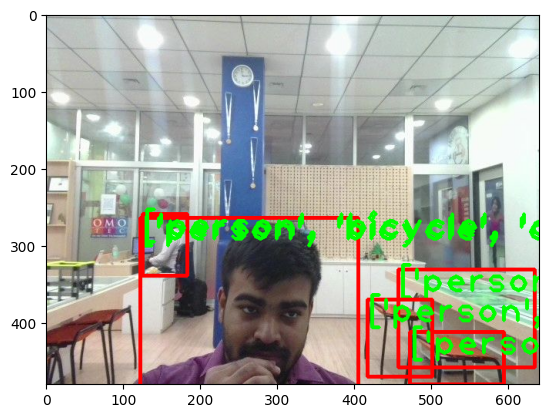

In [ ]:
img = np.asarray(cv2.imread('/content/photo.jpg'))
detect_obj(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))